In [2]:
#Importing pandas for data analysis and Matplotlib and Seaborn for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading in the dataframe from the csv file, produced by the scraping.py file and contained the 'results' folder
df = pd.read_csv('results/result_data.csv')

In [4]:
df.head(10)

,Place,Name,Year of birth,Country code,Country,Time,Event
0,1.0,"DRESSEL, Caeleb",1996,USA,United States,21.07,"Men, 50m Freestyle, Final, Open"
1,2.0,"MANAUDOU, Florent",1990,FRA,France,21.55,"Men, 50m Freestyle, Final, Open"
2,3.0,"FRATUS, Bruno",1989,BRA,Brazil,21.57,"Men, 50m Freestyle, Final, Open"
3,4.0,"ANDREW, Michael C",1999,USA,United States,21.6,"Men, 50m Freestyle, Final, Open"
4,5.0,"PROUD, Benjamin",1994,GBR,Great Britain,21.72,"Men, 50m Freestyle, Final, Open"
5,5.0,"GKOLOMEEV, Kristian",1993,GRE,Greece,21.72,"Men, 50m Freestyle, Final, Open"
6,7.0,"ZAZZERI, Lorenzo",1994,ITA,Italy,21.78,"Men, 50m Freestyle, Final, Open"
7,8.0,"BOER de, Thom",1991,NED,Netherlands,21.79,"Men, 50m Freestyle, Final, Open"
8,1.0,"DRESSEL, Caeleb",1996,USA,United States,21.42,"Men, 50m Freestyle, Semifinal, Open"
9,2.0,"MANAUDOU, Florent",1990,FRA,France,21.53,"Men, 50m Freestyle, Semifinal, Open"


In [5]:
#Displays relevant Dtype information for the dataframe, as well as checks the Null value count of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Place          1015 non-null   object
 1   Name           1015 non-null   object
 2   Year of birth  1015 non-null   int64 
 3   Country code   1015 non-null   object
 4   Country        1015 non-null   object
 5   Time           1015 non-null   object
 6   Event          1015 non-null   object
dtypes: int64(1), object(6)
memory usage: 55.6+ KB


In [6]:
#Casting the 'Time' and 'Place' columns as float values
df['Time'] = pd.to_numeric(df['Time'], errors='coerce', downcast='float')
df['Place'] = pd.to_numeric(df['Place'], errors='coerce', downcast='float')

In [7]:
df.dtypes

Place            float32
Name              object
Year of birth      int64
Country code      object
Country           object
Time             float32
Event             object
dtype: object

In [8]:
df['Year of birth'].value_counts()

1999    116
1996    111
2000    108
1995     90
1997     89
1994     89
2001     84
1998     69
2002     65
1993     51
2003     30
1992     27
1991     22
2004     16
1990     15
1989     10
1985      6
1983      5
1987      4
1986      3
2005      3
1988      2
Name: Year of birth, dtype: int64

In [9]:
#Quick statistical description of the 'Year of birth' column
df['Year of birth'].describe()

count    1015.000000
mean     1997.152709
std         3.742887
min      1983.000000
25%      1995.000000
50%      1997.000000
75%      2000.000000
max      2005.000000
Name: Year of birth, dtype: float64

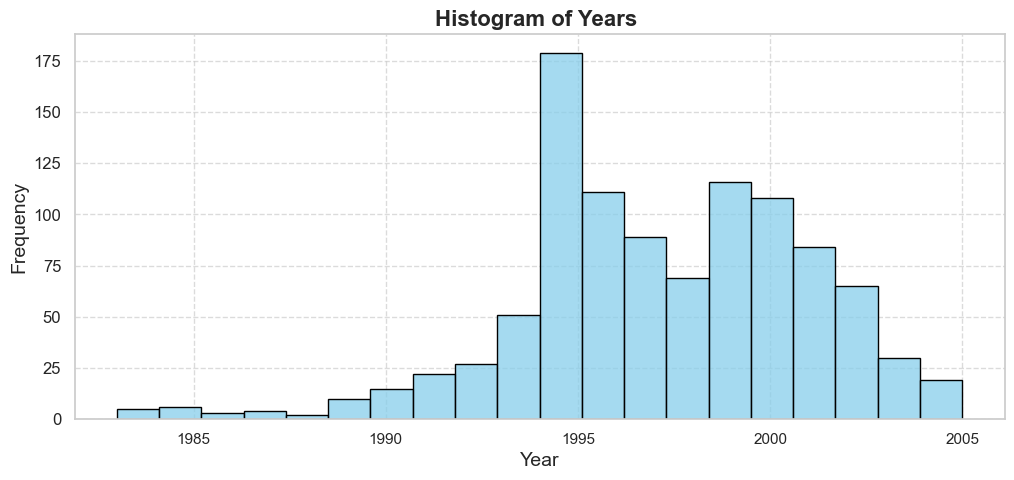

In [10]:
#Plotting the 'Year of birth' column as a histogram using seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))
sns.histplot(df['Year of birth'], bins=20, kde=False, color='skyblue', edgecolor='black')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Years ', fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [31]:
#Initiates a dictionary for filtering using the 'Event'column
keywords = {
    'Final': 'Final',
    'Semifinal': 'Semifinal',
    'Prelim': 'Prelim'
}

#Creates 3 dataframes with the relevant data by filtering on the 'Event' column
df_final = df[df['Event'].str.contains(keywords['Final'], case=True, na=False)]
df_semifinal = df[df['Event'].str.contains(keywords['Semifinal'], case=False, na=False)]
df_prelim = df[df['Event'].str.contains(keywords['Prelim'], case=False, na=False)]

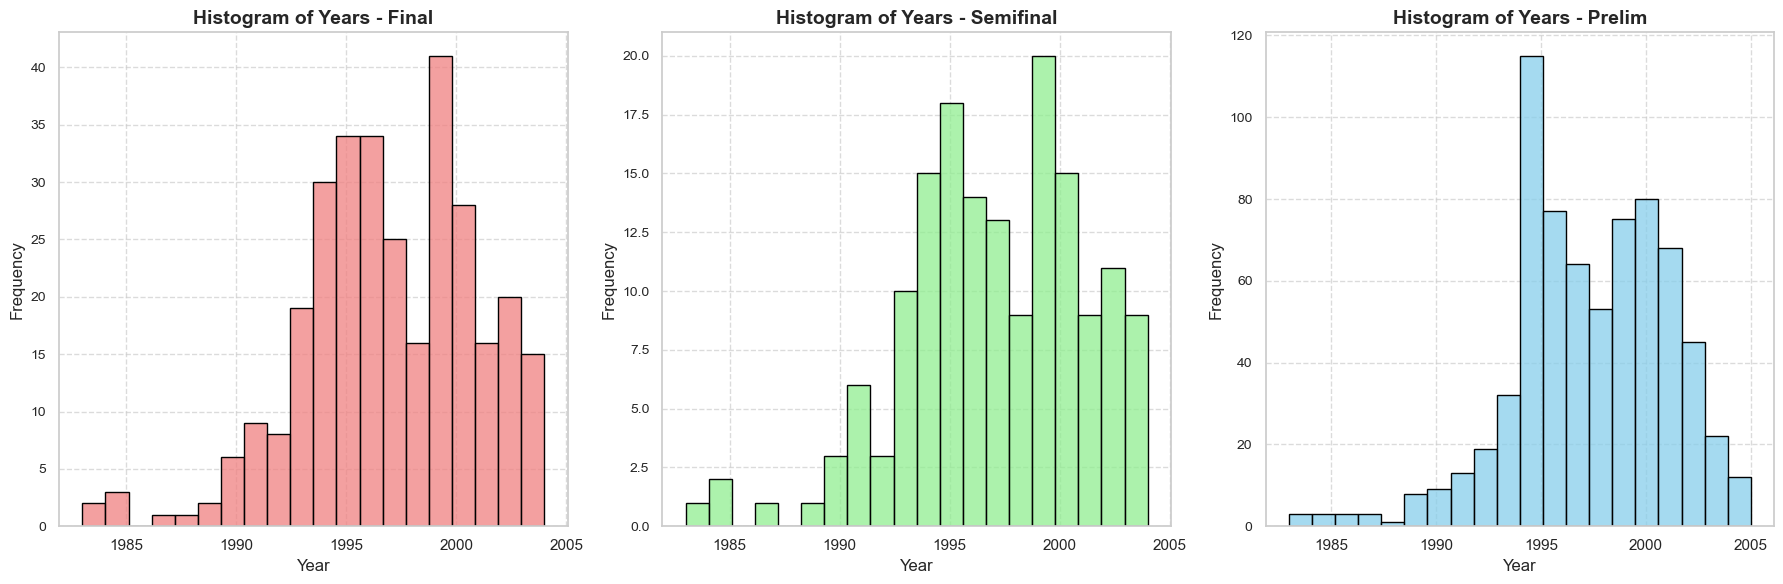

In [12]:
#Plotting the 'Year of birth' histograms as before, this time using the extracted 'Final', 'Semifinal' and 'Prelim' dataframes
sns.set_theme(style="whitegrid")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_final['Year of birth'], bins=20, kde=False, color='lightcoral', edgecolor='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Years - Final', fontsize=14, fontweight='bold')
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
sns.histplot(df_semifinal['Year of birth'], bins=20, kde=False, color='lightgreen', edgecolor='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Years - Semifinal', fontsize=14, fontweight='bold')
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
sns.histplot(df_prelim['Year of birth'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Years - Prelim', fontsize=14, fontweight='bold')
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()


plt.show()

In [13]:
#Creating different sub-dataframes for medal placement 
first_place_df = df[df['Place'] == 1]

second_place_df = df[df['Place'] == 2]

third_place_df = df[df['Place'] == 3]

In [14]:
#Creates a series with the most represented countries in the events
country_series = df.groupby('Country')['Name'].count().sort_values(ascending=False)

country_series

Country
United States    78
Russia           61
Italy            56
Australia        50
Great Britain    49
                 ..
Iceland           1
I. R. Iran        1
Haiti             1
Guyana            1
Zimbabwe          1
Name: Name, Length: 176, dtype: int64

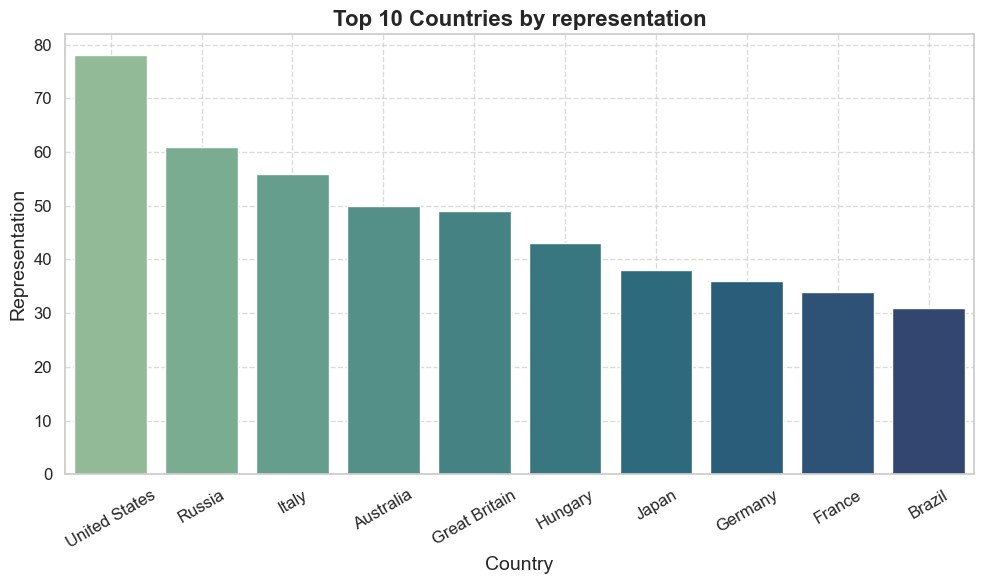

In [15]:
#Plotting the top 10 most represented countries using a seaborn bar plot
top_10_countries = country_series.head(10)


plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='crest')


plt.xlabel('Country', fontsize=14)
plt.ylabel('Representation', fontsize=14)
plt.title('Top 10 Countries by representation', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [16]:
#Showcases the Pandas series of average placement for each country in the finals of every event
placement_by_country = df_final.groupby('Country')['Place'].mean().sort_values(ascending=True)
placement_by_country

Country
Tunisia            1.000000
Finland            4.000000
Great Britain      4.619048
United States      4.763158
China              5.142857
Hungary            5.800000
Austria            6.000000
Ukraine            6.000000
Australia          6.058824
Netherlands        6.125000
Greece             6.333333
Romania            6.500000
Korea              6.600000
Brazil             6.666667
Russia             6.750000
Italy              6.950000
South Africa       7.333333
New Zealand        7.333333
Spain              7.400000
Guatemala          7.500000
Belarus            7.500000
Poland             7.714286
Japan              7.750000
Germany            8.000000
Sweden             8.000000
Switzerland        8.000000
France             8.363636
Bulgaria           9.000000
Lithuania         10.000000
Kazakhstan        11.000000
Serbia            12.500000
Chinese Taipei    13.000000
Canada            13.000000
Estonia           13.000000
Venezuela         15.000000
Norway      

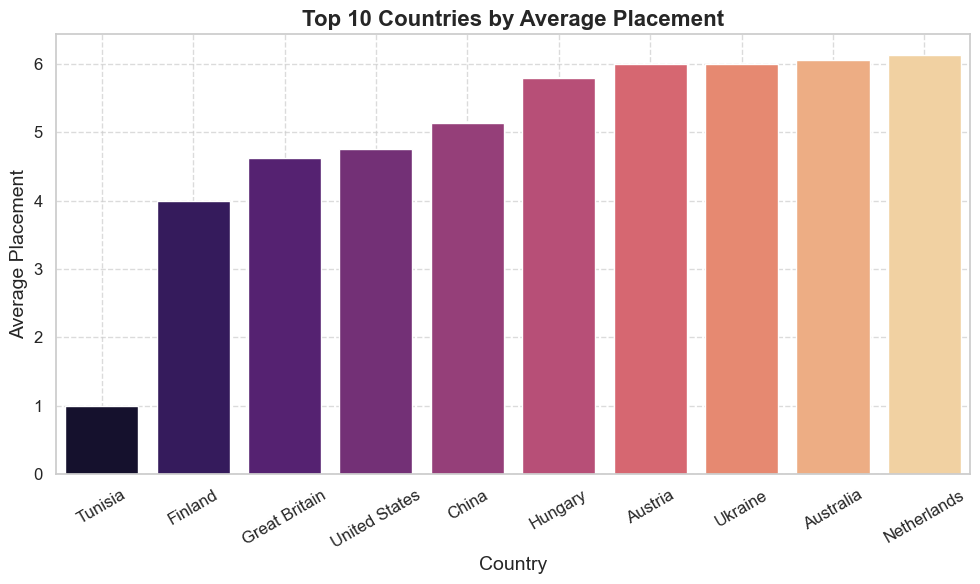

In [17]:
#Graph for the previously created Pandas series on average swimmer placement in the finals
top_10_placement = placement_by_country.head(10)


plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_placement.index, y=top_10_placement.values, palette='magma')


plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Placement', fontsize=14)
plt.title('Top 10 Countries by Average Placement', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [24]:
#Pandas series for the most events envtered by certain athletes 
events_per_athlete = df.groupby('Name')['Event'].count().sort_values(ascending=False)
events_per_athlete

Name
DRESSEL, Caeleb       10
ANDREW, Michael C      9
WELLBROCK, Florian     8
MILAK, Kristof         8
FINKE, Robert C        8
                      ..
KOZMA, Dominik         1
KUSCH, Marius          1
LEE, Hojoon            1
LEE, Se-Bom            1
ZOMBORI, Gabor         1
Name: Event, Length: 430, dtype: int64

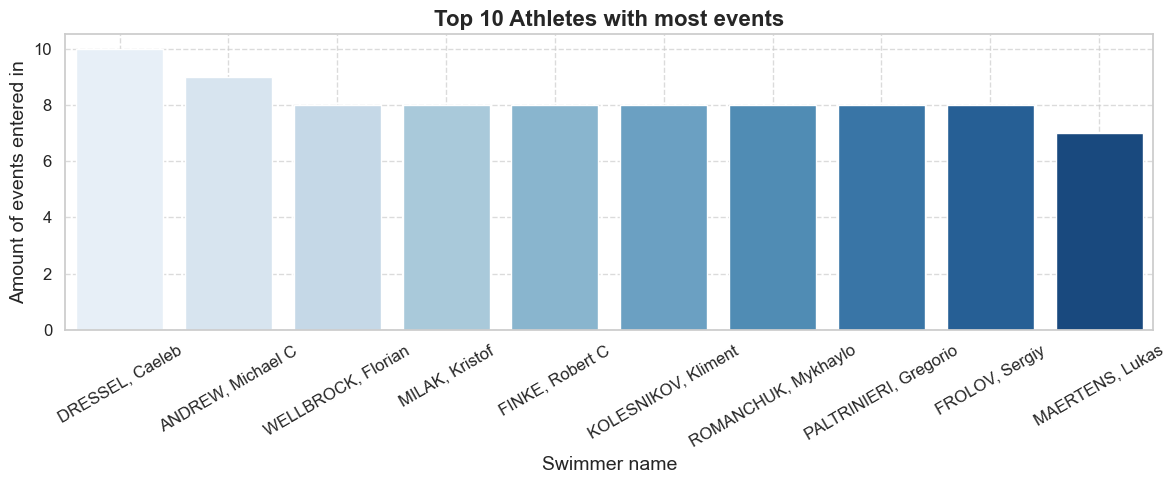

In [28]:
#Graphing the series
most_events = events_per_athlete.head(10)


plt.figure(figsize=(12, 5))
sns.barplot(x=most_events.index, y=most_events.values, palette='Blues')


plt.xlabel('Swimmer name', fontsize=14)
plt.ylabel('Amount of events entered in', fontsize=14)
plt.title('Top 10 Athletes with most events', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [38]:
#Creates a series for the disribution of the medals at the olympics
df_most_gold = df_final[df_final['Place'] == 1].groupby('Country code')['Event'].count().sort_values(ascending=False)
df_most_gold

Country code
USA    6
GBR    2
RUS    2
AUS    1
CHN    1
HUN    1
TUN    1
Name: Event, dtype: int64

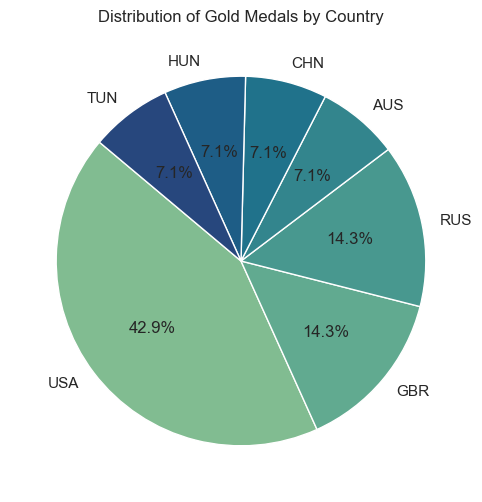

In [58]:
#Plotting the medal distribution using a pie chart
plt.figure(figsize=(10, 6))

colors = sns.color_palette('crest', n_colors=len(df_most_gold))

plt.pie(
    df_most_gold,
    labels=df_most_gold.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Distribution of Gold Medals by Country')

plt.show()